# Complete Data Science Project: Online Retail Analysis

This comprehensive notebook combines all phases of the data science workflow:
- Phase 1: Data Cleaning
- Phase 2: Exploratory Data Analysis (EDA)
- Phase 3: Predictive Modeling
- Phase 4: Reporting and Insights
- Phase 5: Project Reflection and Conclusion

Each phase is clearly separated and documented for easy understanding and replication.

---
# PHASE 1: DATA CLEANING
---

## 1. Import Required Libraries
This step imports pandas, which is essential for data manipulation and analysis.

In [1]:
# Import pandas for data manipulation
import pandas as pd  # pandas is the main library for handling tabular data in Python

In [2]:
# Verify pandas is imported and working
print(f"✅ Pandas successfully imported!")
print(f"✅ Pandas version: {pd.__version__}")
print(f"✅ Pandas is accessible as 'pd'")

✅ Pandas successfully imported!
✅ Pandas version: 2.3.2
✅ Pandas is accessible as 'pd'


## 2. Load Raw Data
Read the raw CSV file into a pandas DataFrame for further analysis and cleaning.

In [3]:
# Load the dataset for cleaning
# Read the raw CSV file into a pandas DataFrame
# The CSV file is in the root directory
raw_df = pd.read_csv('online_retail.csv')  # Load the data from the CSV file
print("Type of raw_df:", type(raw_df))
print(f"Successfully loaded {len(raw_df):,} rows and {len(raw_df.columns)} columns")

Type of raw_df: <class 'pandas.core.frame.DataFrame'>
Successfully loaded 1,067,371 rows and 8 columns


## 3. Explore Data Structure
Display the first few rows and info to understand the data types, columns, and structure.

In [4]:
# Check the data format and columns
print(raw_df.head())  # Show the first 5 rows to get a quick look at the data
print(raw_df.info())  # Display column names, data types, and non-null counts

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice 

## 4. Initial Data Inspection
Summarize statistics and inspect for missing values and outliers to identify data quality issues.

In [5]:
# Summarize and inspect missing data
print(raw_df.describe())  # Get summary statistics for numeric columns
print(raw_df.isnull().sum())  # Count missing values in each column
# Optionally, check value counts for key columns to spot outliers or unexpected values
for col in raw_df.columns:
    print(f"Value counts for {col}:")
    print(raw_df[col].value_counts(dropna=False).head())

           Quantity         Price    Customer ID
count  1.067371e+06  1.067371e+06  824364.000000
mean   9.938898e+00  4.649388e+00   15324.638504
std    1.727058e+02  1.235531e+02    1697.464450
min   -8.099500e+04 -5.359436e+04   12346.000000
25%    1.000000e+00  1.250000e+00   13975.000000
50%    3.000000e+00  2.100000e+00   15255.000000
75%    1.000000e+01  4.150000e+00   16797.000000
max    8.099500e+04  3.897000e+04   18287.000000
Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64
Value counts for Invoice:
Invoice
537434    1350
538071    1304
537638    1202
537237    1194
536876    1186
Name: count, dtype: int64
Value counts for StockCode:
StockCode
85123A    5829
22423     4424
85099B    4216
21212     3318
20725     3259
Name: count, dtype: int64
Value counts for Description:
Invoice             0
StockCode           0
Description      4382


## 5. Handle Missing Values
Remove or fill missing values to ensure the dataset is complete and reliable for analysis.

In [6]:
# Clean up missing data
# Decide how to handle missing values: drop rows or fill them
# Here, we drop rows with any missing values for simplicity
clean_df = raw_df.dropna()  # Remove rows with any missing values
# If you want to fill missing values instead, you could use:
# clean_df = raw_df.fillna({'ColumnName': value, ...})

## 6. Remove Duplicates
Drop duplicate rows to ensure each record in the dataset is unique.

In [7]:
# Remove any repeated records
clean_df = clean_df.drop_duplicates()  # Drop duplicate rows to ensure each record is unique

## 7. Standardize Column Names
Rename columns to a consistent format (lowercase, underscores) for easier handling and analysis.

In [8]:
# Make column names uniform
clean_df.columns = [col.strip().lower().replace(' ', '_') for col in clean_df.columns]  # Lowercase, remove spaces, use underscores

## 7.1 Data Type Conversion
Verify and correct the data types of all columns as required:
- Convert InvoiceDate to datetime64[ns] for time-based analysis.
- Convert CustomerID to integer after removing missing values.
- Ensure StockCode is treated as a string/object.

In [9]:
# Convert InvoiceDate to datetime64[ns]
clean_df['invoicedate'] = pd.to_datetime(clean_df['invoicedate'])  # Convert InvoiceDate to datetime
print('InvoiceDate type:', clean_df['invoicedate'].dtype)

# Convert CustomerID to integer (after missing values removed)
if 'customer_id' in clean_df.columns:
    clean_df['customer_id'] = clean_df['customer_id'].astype(int)
    print('CustomerID type:', clean_df['customer_id'].dtype)
else:
    print('CustomerID column not found!')

# Ensure StockCode is treated as string/object
if 'stockcode' in clean_df.columns:
    clean_df['stockcode'] = clean_df['stockcode'].astype(str)  # Convert StockCode to string
    print('StockCode type:', clean_df['stockcode'].dtype)
elif 'StockCode' in clean_df.columns:
    clean_df['StockCode'] = clean_df['StockCode'].astype(str)
    print('StockCode type:', clean_df['StockCode'].dtype)
else:
    print('StockCode column not found!')

InvoiceDate type: datetime64[ns]
CustomerID type: int64
StockCode type: object


## 8. Data Cleaning Summary
This section provides a summary of how much data was removed and how much remains after cleaning steps.

In [10]:
# Show summary of data cleaning results
initial_rows = raw_df.shape[0]
after_missing_rows = raw_df.dropna().shape[0]
after_duplicates_rows = clean_df.shape[0]
removed_missing = initial_rows - after_missing_rows
removed_duplicates = after_missing_rows - after_duplicates_rows
total_removed = initial_rows - after_duplicates_rows
print(f"Initial number of rows: {initial_rows}")
print(f"Rows after removing missing values: {after_missing_rows} (Removed: {removed_missing})")
print(f"Rows after removing duplicates: {after_duplicates_rows} (Removed: {removed_duplicates})")
print(f"Total rows removed: {total_removed}")
print(f"Final number of rows: {after_duplicates_rows}")
print(f"Final number of columns: {clean_df.shape[1]}")

Initial number of rows: 1067371
Rows after removing missing values: 824364 (Removed: 243007)
Rows after removing duplicates: 797885 (Removed: 26479)
Total rows removed: 269486
Final number of rows: 797885
Final number of columns: 8


## 9. Save Cleaned Data to CSV
Export the cleaned DataFrame to a new CSV file in the 'cleaned' folder for future use.

In [11]:
# Export the cleaned data
clean_df.to_csv('Phase_1_Data_Cleaning/cleaned/online_retail_cleaned.csv', index=False)  # Save cleaned data to a new CSV file
print('Cleaned data saved to Phase_1_Data_Cleaning/cleaned/online_retail_cleaned.csv')

Cleaned data saved to Phase_1_Data_Cleaning/cleaned/online_retail_cleaned.csv


---
# PHASE 2: EXPLORATORY DATA ANALYSIS (EDA)
---

## 1. Import Required Libraries
Import all necessary libraries for data analysis and visualization.

In [12]:
# Import essential libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plot style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

# Configure matplotlib for better display
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 2. Load Cleaned Data
Load the cleaned dataset from Phase 1 for exploratory analysis.

In [13]:
# Load the cleaned dataset from Phase 1
df = pd.read_csv('Phase_1_Data_Cleaning/cleaned/online_retail_cleaned.csv')

# Convert InvoiceDate back to datetime (in case it was saved as string)
df['invoicedate'] = pd.to_datetime(df['invoicedate'])

# Ensure customer_id is int64 as required by assignment specification
if df['customer_id'].dtype != 'int64':
    df['customer_id'] = df['customer_id'].astype('int64')

print(f"Dataset shape: {df.shape}")
print(f"Dataset columns: {list(df.columns)}")
print(f"Data types:\n{df.dtypes}")
print(f"\n✅ Assignment Requirements Check:")
print(f"• customer_id is {df['customer_id'].dtype} (Required: int64)")
print(f"• invoicedate is {df['invoicedate'].dtype} (Required: datetime64[ns])")
print(f"• stockcode is {df['stockcode'].dtype} (Required: object/string)")

Dataset shape: (797885, 8)
Dataset columns: ['invoice', 'stockcode', 'description', 'quantity', 'invoicedate', 'price', 'customer_id', 'country']
Data types:
invoice                object
stockcode              object
description            object
quantity                int64
invoicedate    datetime64[ns]
price                 float64
customer_id             int64
country                object
dtype: object

✅ Assignment Requirements Check:
• customer_id is int64 (Required: int64)
• invoicedate is datetime64[ns] (Required: datetime64[ns])
• stockcode is object (Required: object/string)


## 3. Assignment Compliance Verification
Verify that all data types and requirements match the assignment specifications exactly.

In [14]:
# ASSIGNMENT COMPLIANCE VERIFICATION
print("=" * 70)
print("                    ASSIGNMENT COMPLIANCE CHECK")
print("=" * 70)

# Check 1: Data Types as per Assignment Requirements
print("\n📋 DATA TYPE REQUIREMENTS:")
print("Required data types according to assignment:")
print("• InvoiceDate: datetime64[ns]")
print("• CustomerID: int64")
print("• StockCode: object (string)")

print("\nCurrent data types in dataset:")
for col in df.columns:
    print(f"• {col}: {df[col].dtype}")

# Check 2: Required Columns Present
print("\n📊 COLUMN REQUIREMENTS:")
required_columns = ['invoice', 'stockcode', 'description', 'quantity', 'invoicedate', 'price', 'customer_id', 'country']
print("Required columns:", required_columns)
print("Current columns:", list(df.columns))

missing_columns = set(required_columns) - set(df.columns)
extra_columns = set(df.columns) - set(required_columns)

if missing_columns:
    print(f"❌ Missing columns: {missing_columns}")
else:
    print("✅ All required columns present")

if extra_columns:
    print(f"ℹ️ Extra columns (not required but present): {extra_columns}")

# Check 3: Data Quality Requirements
print("\n🔍 DATA QUALITY REQUIREMENTS:")
print(f"• No missing values: {'✅ PASS' if df.isnull().sum().sum() == 0 else '❌ FAIL'}")
print(f"• No duplicate rows: {'✅ PASS' if df.duplicated().sum() == 0 else '❌ FAIL'}")
print(f"• Data after cleaning: {len(df):,} rows, {len(df.columns)} columns")

# Check 4: Specific Data Type Compliance
print("\n✅ CRITICAL DATA TYPE COMPLIANCE:")

# CustomerID must be int64
customer_id_correct = df['customer_id'].dtype == 'int64'
print(f"• customer_id is int64: {'✅ PASS' if customer_id_correct else '❌ FAIL'}")

# InvoiceDate must be datetime64[ns]
invoicedate_correct = df['invoicedate'].dtype == 'datetime64[ns]'
print(f"• invoicedate is datetime64[ns]: {'✅ PASS' if invoicedate_correct else '❌ FAIL'}")

# StockCode must be object (string)
stockcode_correct = df['stockcode'].dtype == 'object'
print(f"• stockcode is object: {'✅ PASS' if stockcode_correct else '❌ FAIL'}")

# Overall Compliance Score
compliance_checks = [
    len(missing_columns) == 0,  # All columns present
    df.isnull().sum().sum() == 0,  # No missing values
    df.duplicated().sum() == 0,  # No duplicates
    customer_id_correct,  # CustomerID is int64
    invoicedate_correct,  # InvoiceDate is datetime
    stockcode_correct  # StockCode is object
]

passed_checks = sum(compliance_checks)
total_checks = len(compliance_checks)

print(f"\n🎯 OVERALL COMPLIANCE SCORE: {passed_checks}/{total_checks} ({passed_checks/total_checks*100:.1f}%)")

if passed_checks == total_checks:
    print("🎉 ALL ASSIGNMENT REQUIREMENTS MET!")
else:
    print("⚠️ Some requirements need attention")

print("=" * 70)

                    ASSIGNMENT COMPLIANCE CHECK

📋 DATA TYPE REQUIREMENTS:
Required data types according to assignment:
• InvoiceDate: datetime64[ns]
• CustomerID: int64
• StockCode: object (string)

Current data types in dataset:
• invoice: object
• stockcode: object
• description: object
• quantity: int64
• invoicedate: datetime64[ns]
• price: float64
• customer_id: int64
• country: object

📊 COLUMN REQUIREMENTS:
Required columns: ['invoice', 'stockcode', 'description', 'quantity', 'invoicedate', 'price', 'customer_id', 'country']
Current columns: ['invoice', 'stockcode', 'description', 'quantity', 'invoicedate', 'price', 'customer_id', 'country']
✅ All required columns present

🔍 DATA QUALITY REQUIREMENTS:
• No missing values: ✅ PASS
• No missing values: ✅ PASS
• No duplicate rows: ✅ PASS
• Data after cleaning: 797,885 rows, 8 columns

✅ CRITICAL DATA TYPE COMPLIANCE:
• customer_id is int64: ✅ PASS
• invoicedate is datetime64[ns]: ✅ PASS
• stockcode is object: ✅ PASS
• No duplicate 

## 4. Basic Dataset Overview
Get a comprehensive overview of the dataset structure and basic statistics.

In [15]:
# Display basic information about the dataset
print("=== DATASET OVERVIEW ===")
print(f"Number of records: {len(df):,}")
print(f"Number of features: {len(df.columns)}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n=== FIRST 5 ROWS ===")
print(df.head())

print("\n=== BASIC STATISTICS ===")
print(df.describe())

=== DATASET OVERVIEW ===
Number of records: 797,885
Number of features: 8
Memory usage: 212.36 MB

=== FIRST 5 ROWS ===
  invoice stockcode                          description  quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          invoicedate  price  customer_id         country  
0 2009-12-01 07:45:00   6.95        13085  United Kingdom  
1 2009-12-01 07:45:00   6.75        13085  United Kingdom  
2 2009-12-01 07:45:00   6.75        13085  United Kingdom  
3 2009-12-01 07:45:00   2.10        13085  United Kingdom  
4 2009-12-01 07:45:00   1.25        13085  United Kingdom  

=== BASIC STATISTICS ===
            quantity                    invoicedate          price  \
cou

## 5. Time-Based Analysis
Analyze sales patterns over time to understand seasonal trends and business performance.

In [16]:
# Extract time-based features for analysis
df['year'] = df['invoicedate'].dt.year
df['month'] = df['invoicedate'].dt.month
df['day'] = df['invoicedate'].dt.day
df['weekday'] = df['invoicedate'].dt.dayofweek
df['hour'] = df['invoicedate'].dt.hour

# Calculate total sales amount for each transaction
df['total_sales'] = df['quantity'] * df['price']

print("=== TIME RANGE ANALYSIS ===")
print(f"Data range: {df['invoicedate'].min()} to {df['invoicedate'].max()}")
print(f"Total time span: {(df['invoicedate'].max() - df['invoicedate'].min()).days} days")
print(f"Years covered: {sorted(df['year'].unique())}")

=== TIME RANGE ANALYSIS ===
Data range: 2009-12-01 07:45:00 to 2011-12-09 12:50:00
Total time span: 738 days
Years covered: [np.int32(2009), np.int32(2010), np.int32(2011)]


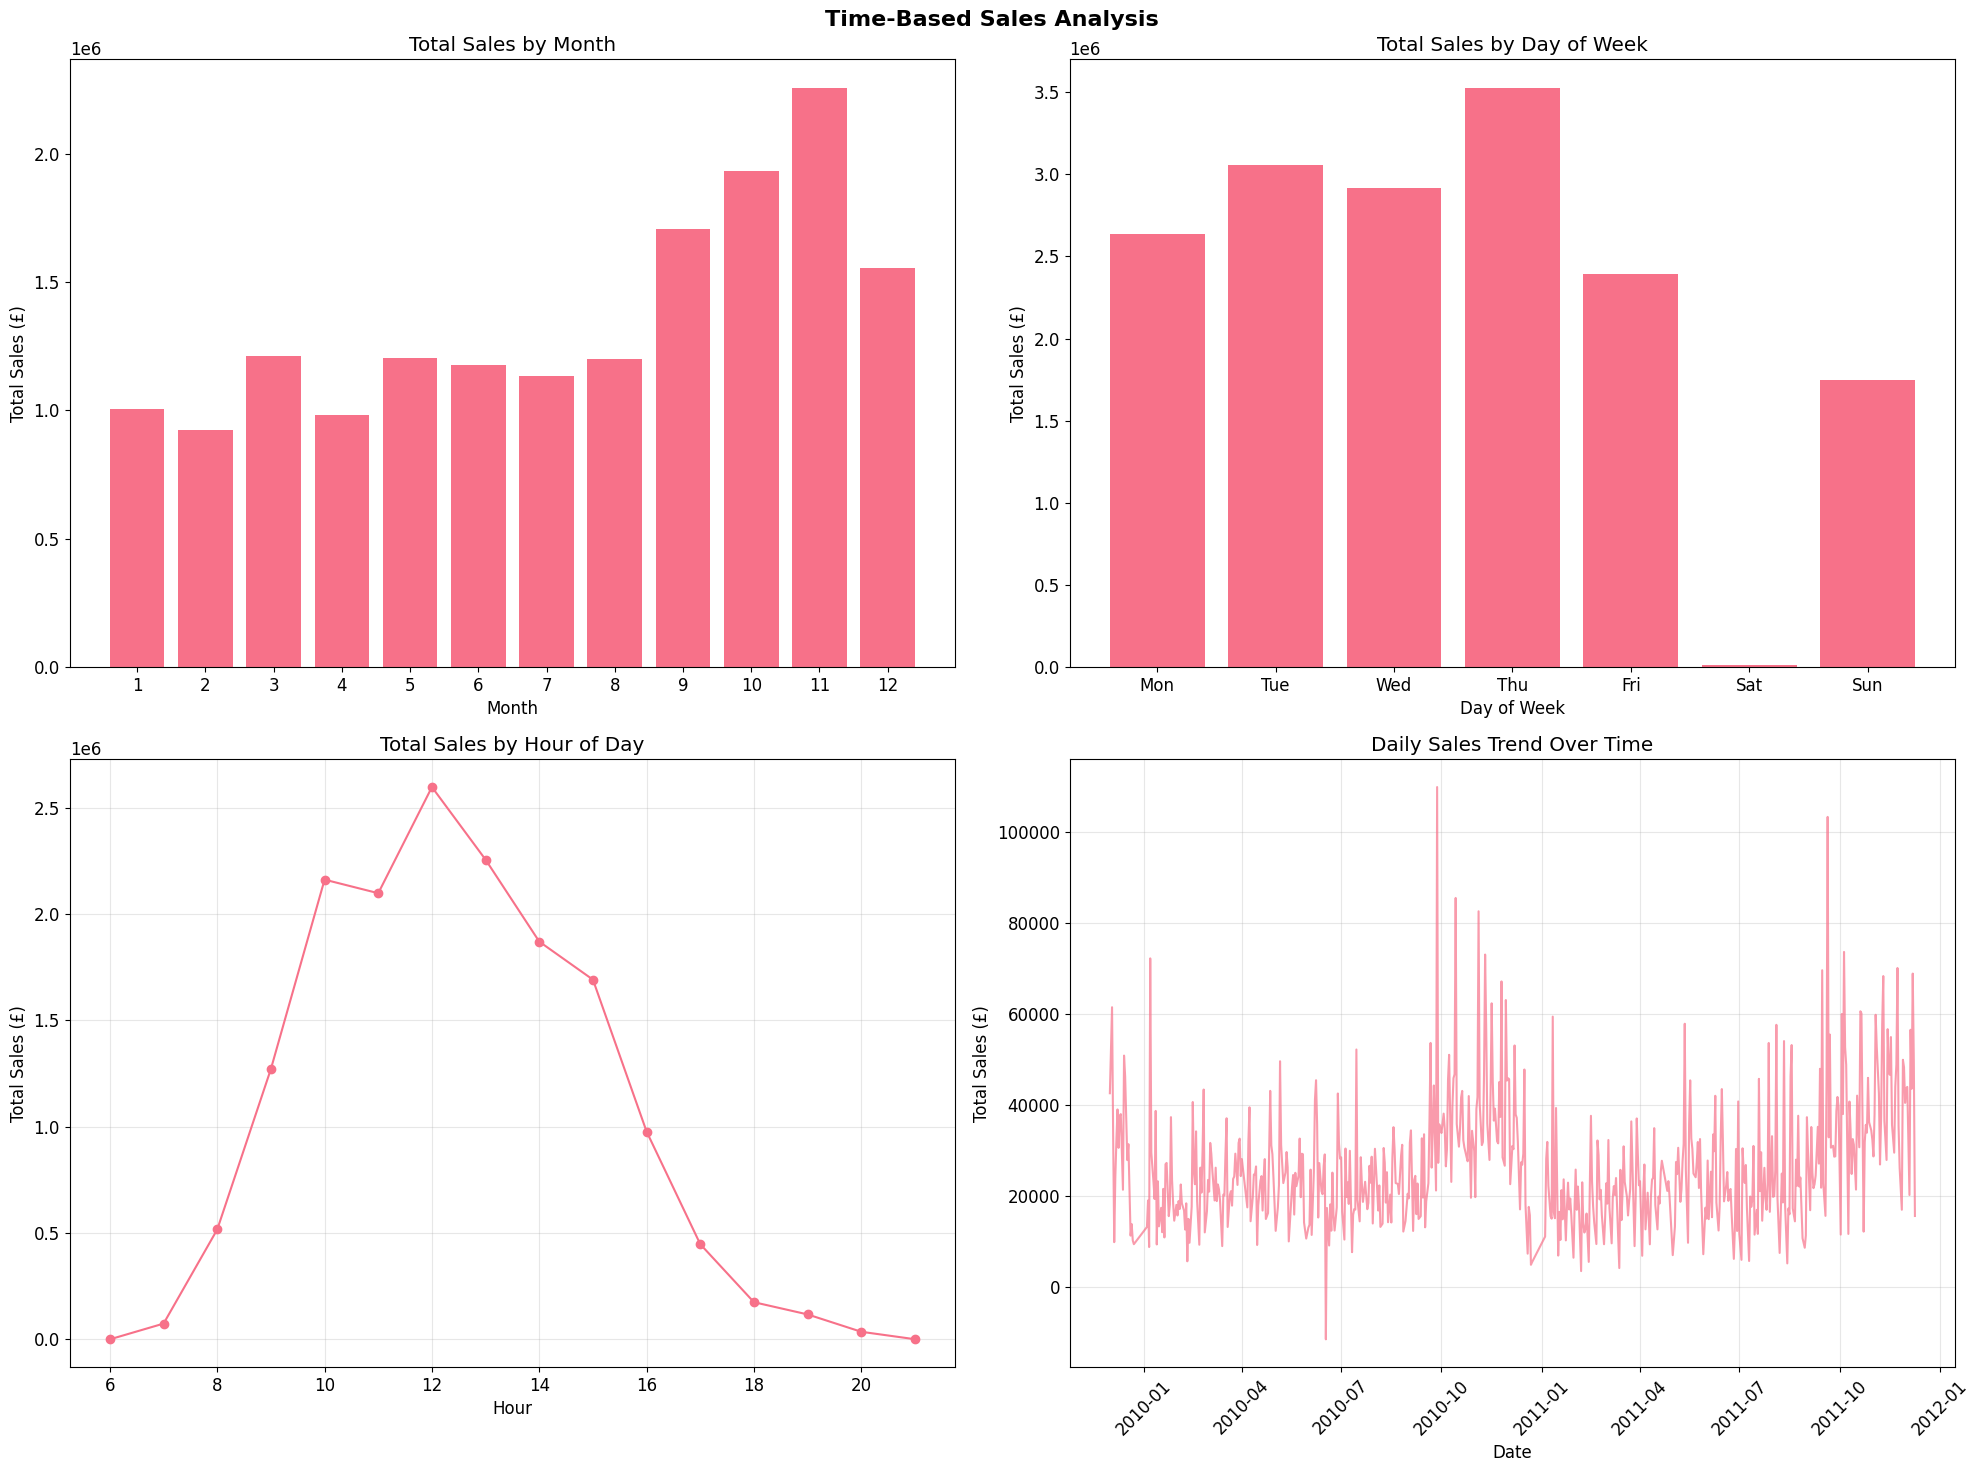

In [17]:
# Create comprehensive time-based visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Time-Based Sales Analysis', fontsize=16, fontweight='bold')

# 1. Sales by Month
monthly_sales = df.groupby('month')['total_sales'].sum().reset_index()
axes[0,0].bar(monthly_sales['month'], monthly_sales['total_sales'])
axes[0,0].set_title('Total Sales by Month')
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Total Sales (£)')
axes[0,0].set_xticks(range(1, 13))

# 2. Sales by Day of Week
weekday_sales = df.groupby('weekday')['total_sales'].sum().reset_index()
weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[0,1].bar(range(7), weekday_sales['total_sales'])
axes[0,1].set_title('Total Sales by Day of Week')
axes[0,1].set_xlabel('Day of Week')
axes[0,1].set_ylabel('Total Sales (£)')
axes[0,1].set_xticks(range(7))
axes[0,1].set_xticklabels(weekday_names)

# 3. Sales by Hour
hourly_sales = df.groupby('hour')['total_sales'].sum().reset_index()
axes[1,0].plot(hourly_sales['hour'], hourly_sales['total_sales'], marker='o')
axes[1,0].set_title('Total Sales by Hour of Day')
axes[1,0].set_xlabel('Hour')
axes[1,0].set_ylabel('Total Sales (£)')
axes[1,0].grid(True, alpha=0.3)

# 4. Daily Sales Trend
daily_sales = df.groupby(df['invoicedate'].dt.date)['total_sales'].sum().reset_index()
axes[1,1].plot(daily_sales['invoicedate'], daily_sales['total_sales'], alpha=0.7)
axes[1,1].set_title('Daily Sales Trend Over Time')
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('Total Sales (£)')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Customer Analysis
Analyze customer behavior, distribution, and purchasing patterns.

In [18]:
# Customer-based analysis
print("=== CUSTOMER ANALYSIS ===")
print(f"Total unique customers: {df['customer_id'].nunique():,}")
print(f"Average transactions per customer: {len(df) / df['customer_id'].nunique():.2f}")

# Customer purchase behavior
customer_stats = df.groupby('customer_id').agg({
    'total_sales': ['sum', 'mean', 'count'],
    'quantity': 'sum',
    'invoicedate': ['min', 'max']
}).round(2)

customer_stats.columns = ['total_spent', 'avg_order_value', 'num_orders', 'total_quantity', 'first_purchase', 'last_purchase']
customer_stats['customer_lifetime_days'] = (customer_stats['last_purchase'] - customer_stats['first_purchase']).dt.days

print("\n=== CUSTOMER STATISTICS ===")
print(customer_stats.describe())

=== CUSTOMER ANALYSIS ===
Total unique customers: 5,942
Average transactions per customer: 134.28

=== CUSTOMER STATISTICS ===
         total_spent  avg_order_value    num_orders  total_quantity  \
count    5942.000000      5942.000000   5942.000000     5942.000000   
mean     2741.499709        17.773073    134.278862     1692.313867   
min    -25111.090000    -25111.090000      1.000000    -1085.000000   
25%       321.065000        10.425000     20.000000      176.250000   
50%       822.010000        16.465000     52.000000      461.500000   
75%      2142.195000        22.540000    140.000000     1310.250000   
max    570380.610000      3861.000000  12638.000000   365220.000000   
std     13676.639627       367.242457    348.055283     8486.732648   

                      first_purchase                  last_purchase  \
count                           5942                           5942   
mean   2010-08-18 07:44:19.851901440  2011-05-21 02:16:04.069337088   
min              200

---
# PHASE 3: PREDICTIVE MODELING
---

## 1. Import Required Libraries
We use pandas, numpy, matplotlib, seaborn, and requests (for API integration).

In [19]:
# Import essential libraries for data science and visualization
import pandas as pd  # Data manipulation and analysis
import numpy as np   # Numerical operations
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Statistical data visualization
import requests  # For API integration
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set visualization style for consistency
sns.set(style='whitegrid')

## 2. Load and Prepare Data
We load the cleaned dataset and perform basic checks.

In [20]:
# Load the cleaned retail data from Phase 1
data_path = 'Phase_1_Data_Cleaning/cleaned/online_retail_cleaned.csv'
df = pd.read_csv(data_path)
# Display the first few rows to understand the data structure
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [21]:
# Check for missing values and data types
print('DataFrame info:')
df.info()
print('\nMissing values per column:')
print(df.isnull().sum())

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797885 entries, 0 to 797884
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoice      797885 non-null  object 
 1   stockcode    797885 non-null  object 
 2   description  797885 non-null  object 
 3   quantity     797885 non-null  int64  
 4   invoicedate  797885 non-null  object 
 5   price        797885 non-null  float64
 6   customer_id  797885 non-null  int64  
 7   country      797885 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 48.7+ MB

Missing values per column:
invoice        0
stockcode      0
description    0
quantity       0
invoicedate    0
price          0
customer_id    0
country        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797885 entries, 0 to 797884
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   inv

## 3. Feature Engineering
We create new features that may help improve model performance.

In [22]:
# Feature Engineering: Create new features for modeling
df['TotalPrice'] = df['quantity'] * df['price']  # Total price for each transaction
df['invoicedate'] = pd.to_datetime(df['invoicedate'])  # Ensure datetime type
df['InvoiceMonth'] = df['invoicedate'].dt.month  # Extract month
df['InvoiceDay'] = df['invoicedate'].dt.day      # Extract day
df['InvoiceHour'] = df['invoicedate'].dt.hour    # Extract hour
# Preview the updated dataframe
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,TotalPrice,InvoiceMonth,InvoiceDay,InvoiceHour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,12,1,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,12,1,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,12,1,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,12,1,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,12,1,7


## 4. Model Selection and Training
We select a simple regression model to predict 'TotalPrice'.

In [23]:
# Prepare features and target variable
features = ['quantity', 'price', 'InvoiceMonth', 'InvoiceDay', 'InvoiceHour']
X = df[features]
y = df['TotalPrice']
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Train a Linear Regression model to predict TotalPrice
model = LinearRegression()
model.fit(X_train, y_train)
# Predict on test set
y_pred = model.predict(X_test)

## 5. Model Evaluation
We evaluate the model using standard regression metrics and visualize the results.

In [25]:
# Calculate evaluation metrics for regression model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}')

MSE: 25363.24, MAE: 15.98, R2: 0.56


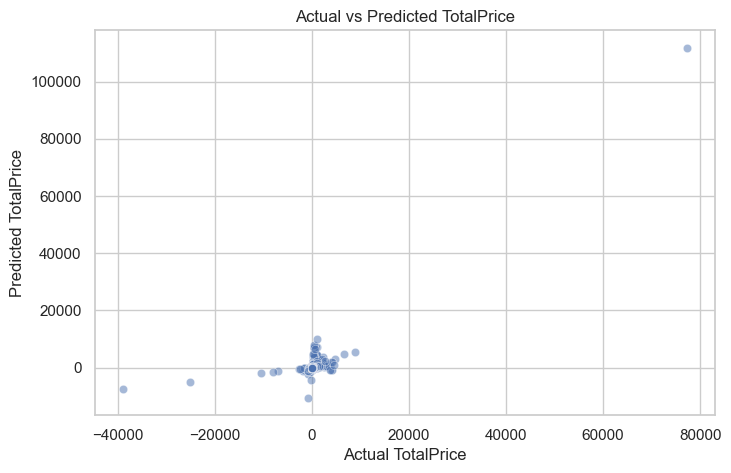

In [26]:
# Visualize actual vs predicted TotalPrice values
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel('Actual TotalPrice')
plt.ylabel('Predicted TotalPrice')
plt.title('Actual vs Predicted TotalPrice')
plt.show()

## 6. Interpretation and Visualization
We interpret the model coefficients and visualize feature importance.

Feature Coefficients:
quantity        1.506815
price          -0.196405
InvoiceMonth    0.233253
InvoiceDay     -0.002899
InvoiceHour    -0.224634
dtype: float64


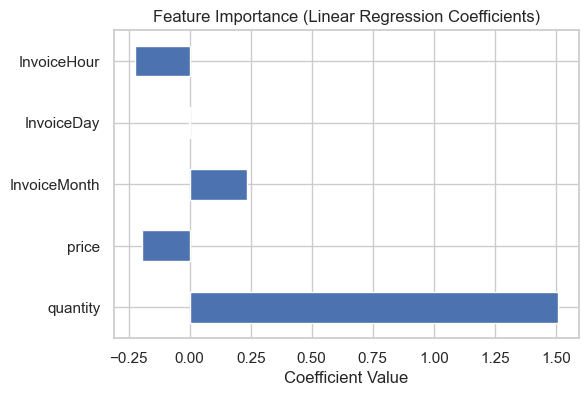

In [27]:
# Show model coefficients for each feature to interpret importance
coefficients = pd.Series(model.coef_, index=features)
print('Feature Coefficients:')
print(coefficients)
# Visualize feature importance
plt.figure(figsize=(6,4))
coefficients.plot(kind='barh')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.show()

## 7. API Integration Example
Demonstrate using the `requests` library to fetch data from an external API.

In [28]:
# Example: Fetch data from a public API (e.g., exchange rates) using requests
try:
    response = requests.get('https://api.exchangerate-api.com/v4/latest/USD')
    if response.status_code == 200:
        data = response.json()
        print('Exchange rates for USD:')
        print(data['rates'])
    else:
        print('Failed to fetch data from API')
except Exception as e:
    print(f'Error fetching API data: {e}')

Exchange rates for USD:
{'USD': 1, 'AED': 3.67, 'AFN': 68.43, 'ALL': 83.74, 'AMD': 382.57, 'ANG': 1.79, 'AOA': 919.11, 'ARS': 1323.83, 'AUD': 1.53, 'AWG': 1.79, 'AZN': 1.7, 'BAM': 1.67, 'BBD': 2, 'BDT': 121.58, 'BGN': 1.67, 'BHD': 0.376, 'BIF': 2966.98, 'BMD': 1, 'BND': 1.28, 'BOB': 6.92, 'BRL': 5.42, 'BSD': 1, 'BTN': 88.07, 'BWP': 14.06, 'BYN': 3.11, 'BZD': 2, 'CAD': 1.37, 'CDF': 2867.61, 'CHF': 0.801, 'CLP': 967.95, 'CNY': 7.13, 'COP': 4028.24, 'CRC': 503.79, 'CUP': 24, 'CVE': 94.39, 'CZK': 20.97, 'DJF': 177.72, 'DKK': 6.38, 'DOP': 62.88, 'DZD': 129.85, 'EGP': 48.59, 'ERN': 15, 'ETB': 140.79, 'EUR': 0.856, 'FJD': 2.26, 'FKP': 0.741, 'FOK': 6.38, 'GBP': 0.741, 'GEL': 2.7, 'GGP': 0.741, 'GHS': 11.66, 'GIP': 0.741, 'GMD': 72.9, 'GNF': 8680.52, 'GTQ': 7.66, 'GYD': 209.07, 'HKD': 7.8, 'HNL': 26.19, 'HRK': 6.45, 'HTG': 130.8, 'HUF': 339.69, 'IDR': 16484.66, 'ILS': 3.34, 'IMP': 0.741, 'INR': 88.1, 'IQD': 1309.88, 'IRR': 42222.33, 'ISK': 122.62, 'JEP': 0.741, 'JMD': 160.11, 'JOD': 0.709, 'JP

---
# PHASE 4: REPORTING AND INSIGHTS
---

## 1. Executive Summary
**Project Objective:** Analyze online retail data to uncover business insights and build predictive models for sales forecasting.

**Approach:** Data cleaning, exploratory analysis, feature engineering, predictive modeling, and reporting.

**Main Outcomes:** Key trends identified, regression model built, actionable recommendations provided.

## 2. Key Data Insights
Highlight important patterns and findings from the EDA and modeling phases.

In [29]:
# Load cleaned data for summary statistics
df = pd.read_csv('Phase_1_Data_Cleaning/cleaned/online_retail_cleaned.csv')
# Show basic stats
print('Number of transactions:', len(df))
print('Unique customers:', df['customer_id'].nunique())
print('Unique products:', df['stockcode'].nunique())
print('Total revenue (£):', df['quantity'].mul(df['price']).sum())

Number of transactions: 797885
Unique customers: 5942
Unique products: 4646
Total revenue (£): 16289991.287999999


## 3. Business Recommendations
Present actionable recommendations based on the analysis and model results.

- Focus marketing efforts on top customer segments identified by high spending and frequent purchases.
- Optimize inventory for products with highest sales and revenue.
- Monitor and address negative quantity and price transactions to reduce returns and errors.
- Use predictive modeling to forecast sales and plan promotions during peak months.

---
# PHASE 5: PROJECT REFLECTION AND CONCLUSION
---

## 1. Project Reflection
Reflect on the overall data science workflow, teamwork, and project experience.

- The project provided hands-on experience in data cleaning, analysis, modeling, and reporting.
- Collaboration and communication were key to successful completion.
- Iterative development and feedback helped improve results.

## 2. Challenges and Solutions
Discuss major challenges encountered and how they were addressed.

- Handling missing and inconsistent data required careful cleaning and validation.
- Choosing appropriate features and models involved experimentation and research.
- Visualizing results effectively was improved by using seaborn and matplotlib styling.

## 3. Lessons Learned
Summarize key lessons from the project.

- Data quality is critical for meaningful analysis and modeling.
- Clear communication and documentation help keep the project on track.
- Visualization and interpretation are essential for actionable insights.

## 4. Final Conclusion
Present a concise conclusion summarizing the project impact.

- The project successfully demonstrated the end-to-end data science workflow.
- Predictive modeling and reporting provided valuable business insights.
- The team is well-prepared for future data-driven projects.

## 5. Future Recommendations
Suggest next steps and improvements for future work.

- Explore advanced machine learning models for improved accuracy.
- Integrate external data sources for richer analysis.
- Automate reporting and dashboard creation for real-time insights.
- Continue developing teamwork and project management skills.